In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
## Loading the dataset
df = pd.read_csv('superstore_5000_rows.csv')

In [7]:
df.head()

,Customer_ID,Gender,Age,City,Product_Category,Quantity,Unit_Price,Discount(%),Payment_Method,Total_Amount
0,C00001,Female,52,Hyderabad,Clothing,4,500,7,Card,2000
1,C00002,Male,50,Bangalore,Clothing,5,1000,17,UPI,5000
2,C00003,Male,49,Pune,Books,3,450,19,UPI,1350
3,C00004,Female,18,Chennai,Books,6,2000,3,UPI,12000
4,C00005,Female,43,Bangalore,Grocery,2,20000,7,Card,40000


In [8]:
df.shape

(5000, 10)

In [9]:
df.dtypes

Customer_ID         object
Gender              object
Age                  int64
City                object
Product_Category    object
Quantity             int64
Unit_Price           int64
Discount(%)          int64
Payment_Method      object
Total_Amount         int64
dtype: object

In [10]:
## Dropping the customer_ID column , becoz it has no use 
df.drop('Customer_ID' , axis=1, inplace=True)

In [11]:
df.dtypes

Gender              object
Age                  int64
City                object
Product_Category    object
Quantity             int64
Unit_Price           int64
Discount(%)          int64
Payment_Method      object
Total_Amount         int64
dtype: object

In [12]:
## Checking for Missing values
df.isnull().sum()

Gender              0
Age                 0
City                0
Product_Category    0
Quantity            0
Unit_Price          0
Discount(%)         0
Payment_Method      0
Total_Amount        0
dtype: int64

In [13]:
## Checking for duplicates 
df.duplicated().sum()

1

In [14]:
## As one duplicate values is there , we will drop it
df = df.drop_duplicates()

In [15]:
## Again checking for duplicate values, and now it is 0
df.duplicated().sum()

0

In [16]:
## Checking for null values 
df.isna().sum()

Gender              0
Age                 0
City                0
Product_Category    0
Quantity            0
Unit_Price          0
Discount(%)         0
Payment_Method      0
Total_Amount        0
dtype: int64

In [17]:
df.dtypes

Gender              object
Age                  int64
City                object
Product_Category    object
Quantity             int64
Unit_Price           int64
Discount(%)          int64
Payment_Method      object
Total_Amount         int64
dtype: object

In [18]:
df.drop('Total_Amount', axis=1, inplace=True)

In [19]:
df

,Gender,Age,City,Product_Category,Quantity,Unit_Price,Discount(%),Payment_Method
0,Female,52,Hyderabad,Clothing,4,500,7,Card
1,Male,50,Bangalore,Clothing,5,1000,17,UPI
2,Male,49,Pune,Books,3,450,19,UPI
3,Female,18,Chennai,Books,6,2000,3,UPI
4,Female,43,Bangalore,Grocery,2,20000,7,Card
...,...,...,...,...,...,...,...,...
4995,Male,22,Pune,Books,4,2000,12,Cash
4996,Male,40,Bangalore,Electronics,1,1800,14,Cash
4997,Male,32,Kolkata,Grocery,5,5000,1,UPI
4998,Female,36,Chennai,Clothing,3,450,1,Cash


In [20]:
## We are creating a new column Total_price , by adding the discount in the total_price , so that we can that the imp features
df['Total_price'] = df['Unit_Price']*df['Quantity'] * (1- df['Discount(%)']/100)

In [21]:
df['Total_price']

0        1860.0
1        4150.0
2        1093.5
3       11640.0
4       37200.0
         ...   
4995     7040.0
4996     1548.0
4997    24750.0
4998     1336.5
4999      522.0
Name: Total_price, Length: 4999, dtype: float64

In [22]:
df

,Gender,Age,City,Product_Category,Quantity,Unit_Price,Discount(%),Payment_Method,Total_price
0,Female,52,Hyderabad,Clothing,4,500,7,Card,1860.0
1,Male,50,Bangalore,Clothing,5,1000,17,UPI,4150.0
2,Male,49,Pune,Books,3,450,19,UPI,1093.5
3,Female,18,Chennai,Books,6,2000,3,UPI,11640.0
4,Female,43,Bangalore,Grocery,2,20000,7,Card,37200.0
...,...,...,...,...,...,...,...,...,...
4995,Male,22,Pune,Books,4,2000,12,Cash,7040.0
4996,Male,40,Bangalore,Electronics,1,1800,14,Cash,1548.0
4997,Male,32,Kolkata,Grocery,5,5000,1,UPI,24750.0
4998,Female,36,Chennai,Clothing,3,450,1,Cash,1336.5


In [23]:
df.dtypes

Gender               object
Age                   int64
City                 object
Product_Category     object
Quantity              int64
Unit_Price            int64
Discount(%)           int64
Payment_Method       object
Total_price         float64
dtype: object

In [24]:
df['City'].unique()

array(['Hyderabad', 'Bangalore', 'Pune', 'Chennai', 'Delhi', 'Mumbai',
       'Kolkata'], dtype=object)

In [25]:
## Converting city column to category
df['City'] = df['City'].astype('category')

In [26]:
df.dtypes

Gender                object
Age                    int64
City                category
Product_Category      object
Quantity               int64
Unit_Price             int64
Discount(%)            int64
Payment_Method        object
Total_price          float64
dtype: object

In [27]:
df['Product_Category'].unique()

array(['Clothing', 'Books', 'Grocery', 'Electronics'], dtype=object)

In [28]:
## Converting payment method column to category
df['Payment_Method'] = df['Payment_Method'].astype('category')

In [29]:
df['Product_Category'] = df['Product_Category'].astype('category')

In [30]:
df.dtypes

Gender                object
Age                    int64
City                category
Product_Category    category
Quantity               int64
Unit_Price             int64
Discount(%)            int64
Payment_Method      category
Total_price          float64
dtype: object

In [31]:
## EDA >> Top 5 product categories by total sales

In [32]:
top_cat = df.groupby('Product_Category')['Total_price'].sum()

In [33]:
top_cat = top_cat.sort_values(ascending=False).head(5)

In [34]:
top_cat

Product_Category
Grocery        18327240.0
Electronics    17113031.0
Clothing       16976650.0
Books          15933287.5
Name: Total_price, dtype: float64

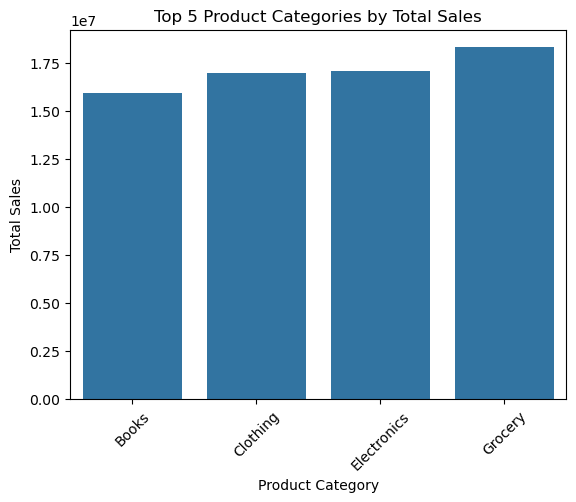

In [35]:
top_categories_df = top_cat.reset_index()
sns.barplot(data = top_categories_df, x = 'Product_Category', y= 'Total_price')
plt.title('Top 5 Product Categories by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

In [36]:
top_category = df.groupby('Product_Category')['Discount(%)'].mean()

In [37]:
top_category

Product_Category
Books          9.739984
Clothing       9.863105
Electronics    9.821317
Grocery        9.946486
Name: Discount(%), dtype: float64

In [38]:
top_category  = top_category.sort_values(ascending=False).head(5)

In [39]:
top_category

Product_Category
Grocery        9.946486
Clothing       9.863105
Electronics    9.821317
Books          9.739984
Name: Discount(%), dtype: float64

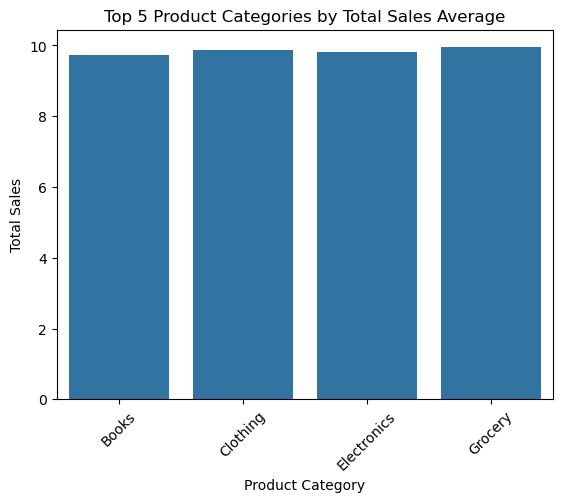

In [40]:
top_category_df= top_category.reset_index()
sns.barplot(data = top_category_df, x = 'Product_Category', y= 'Discount(%)' )
plt.title('Top 5 Product Categories by Total Sales Average')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

##  Distribution of sales by payment method

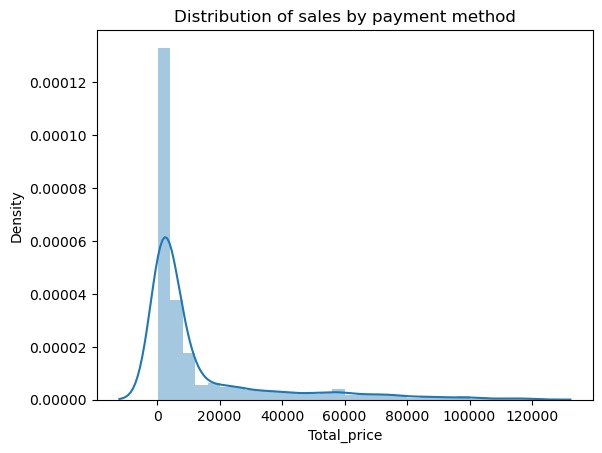

In [41]:
sns.distplot(x = df['Total_price'],kde = True, bins = 30)
plt.title('Distribution of sales by payment method')
plt.xlabel('Total_price')
plt.show()

 Distribution of sales by payment method

In [42]:
top_payment = df.groupby('Payment_Method')['Total_price'].sum()

In [43]:
top_payment = top_payment.sort_values(ascending=False).head(5)

In [44]:
top_payment

Payment_Method
Cash    23181177.0
UPI     22972325.5
Card    22196706.0
Name: Total_price, dtype: float64

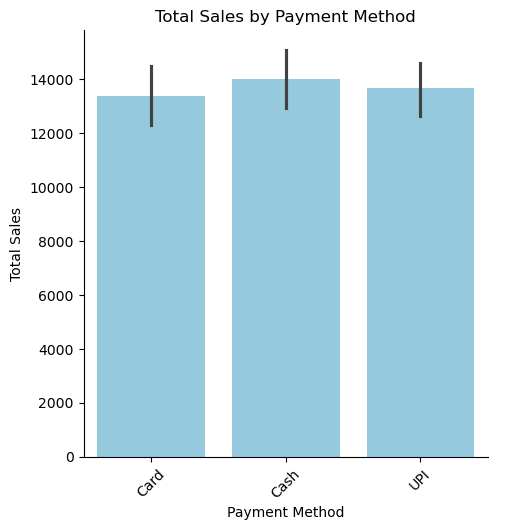

In [45]:
sns.catplot(data = df, x= 'Payment_Method', y='Total_price', kind = 'bar', color= 'skyblue')

plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

 Sales by city (top 10 cities)

In [46]:
df.groupby('City')['Total_price'].sum()

City
Bangalore     9817664.0
Chennai       8706598.0
Delhi         9627355.0
Hyderabad    10650079.0
Kolkata       9996042.0
Mumbai        9856420.0
Pune          9696050.5
Name: Total_price, dtype: float64

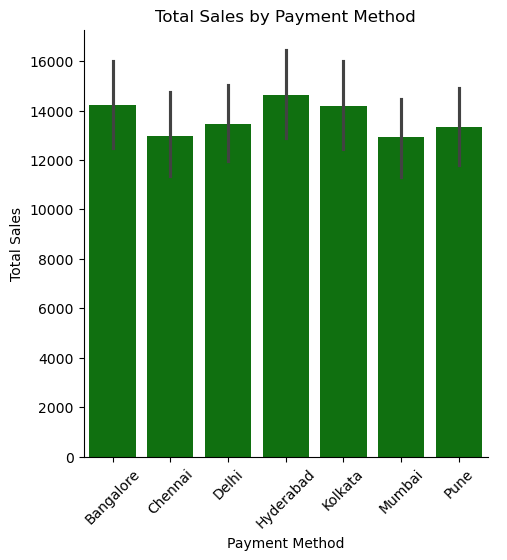

In [47]:
sns.catplot(data = df, x= 'City', y='Total_price', kind = 'bar', color= 'green')

plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

In [48]:
## Its hyderabad city for top sales 

 Average total price per gender

In [50]:
df.groupby('Gender')['Total_price'].mean()

Gender
Female    13407.090744
Male      13933.095446
Name: Total_price, dtype: float64

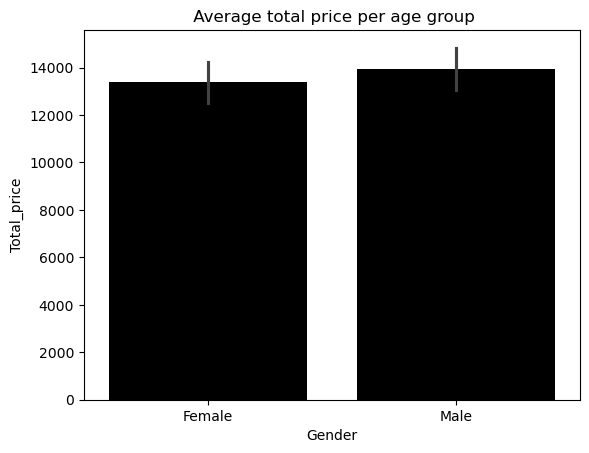

In [53]:
sns.barplot(data = df, x= 'Gender', y = 'Total_price', color = 'black')
plt.title(' Average total price per age group')
plt.xlabel('Gender')
plt.ylabel('Total_price')
plt.show()


What is the relationship between quantity ordered and total price? Does buying more always lead to higher total spending?

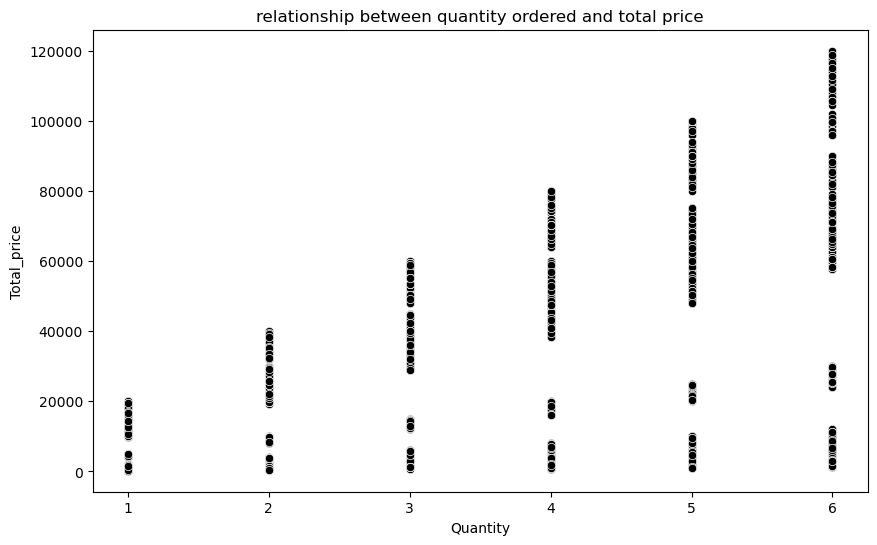

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Quantity', y = 'Total_price', color = 'black', markers='+')
plt.title('relationship between quantity ordered and total price')
plt.xlabel('Quantity')
plt.ylabel('Total_price')
plt.show()

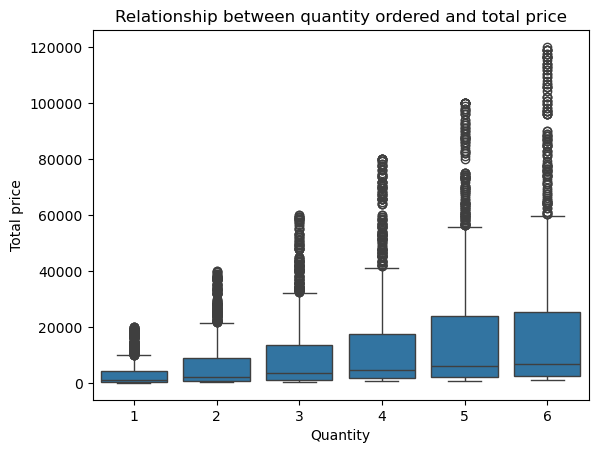

In [55]:
sns.boxplot(data = df, x= 'Quantity', y= 'Total_price')
plt.title('Relationship between quantity ordered and total price')
plt.xlabel('Quantity')
plt.ylabel('Total price')
plt.show()

There is a clear upward trend: as the quantity ordered increases from 1 to 6, the median total price also increases.

The spread (interquartile range) of Total_price widens at higher quantities, showing more variation in how much people spend when they buy in larger quantities.

Presence of outliers at every quantity level, especially at higher quantities, suggests that some customers place very large orders that significantly increase the total price.

Overall, this indicates that customers who buy higher quantities tend to spend more, but there is still significant variation depending on other factors like unit price and discount.

In [56]:
df.dtypes

Gender                object
Age                    int64
City                category
Product_Category    category
Quantity               int64
Unit_Price             int64
Discount(%)            int64
Payment_Method      category
Total_price          float64
dtype: object

In [59]:
num_col = ['Age', 'Quantity', 'Unit_Price', 'Discount(%)', 'Total_price']

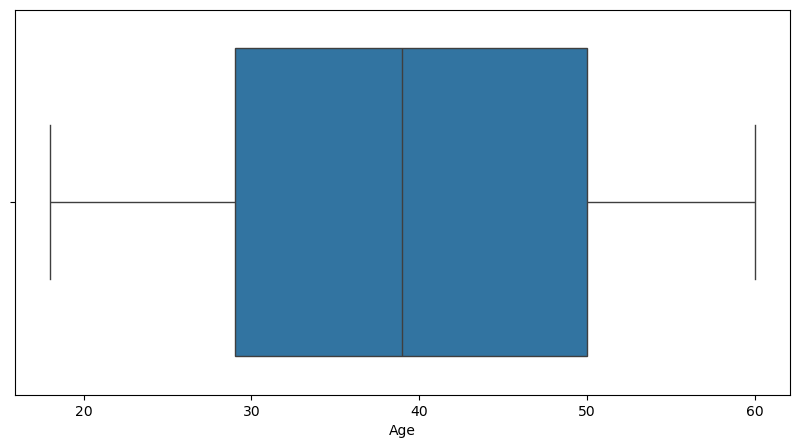

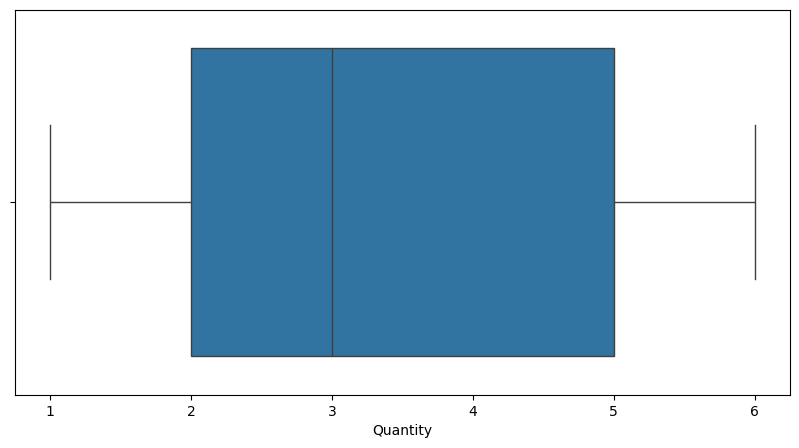

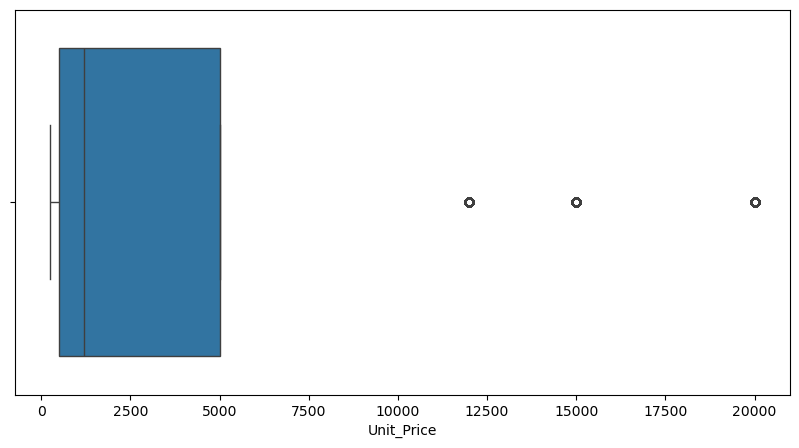

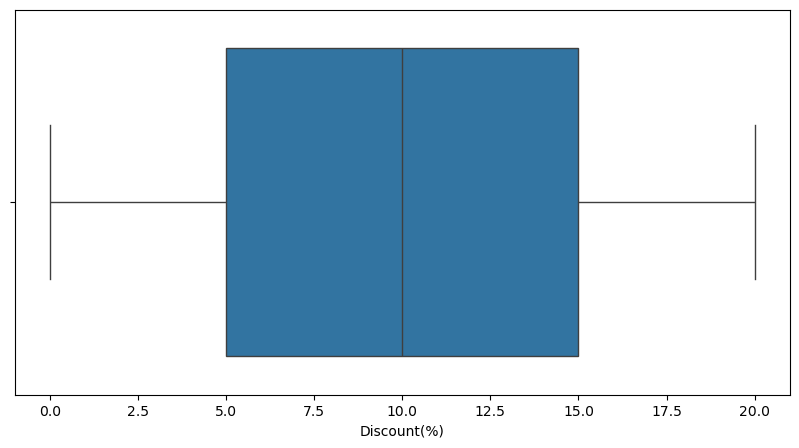

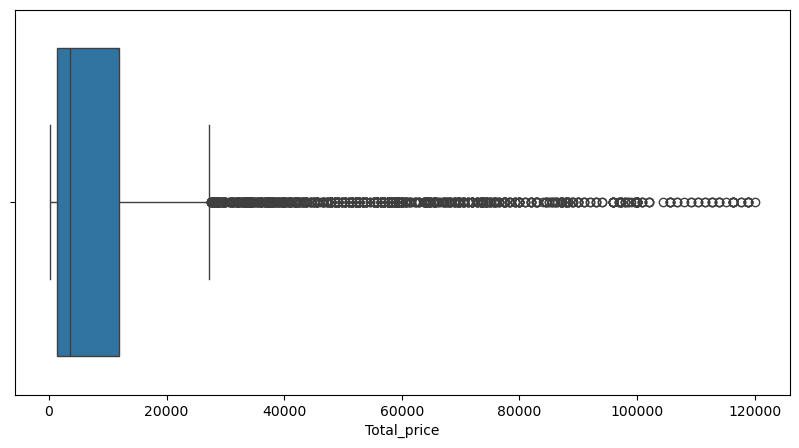

In [63]:
num_col = ['Age', 'Quantity', 'Unit_Price', 'Discount(%)', 'Total_price']
for i in num_col:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x = i)
    plt.show()

Does giving a higher discount (%) actually lead to higher total sales?

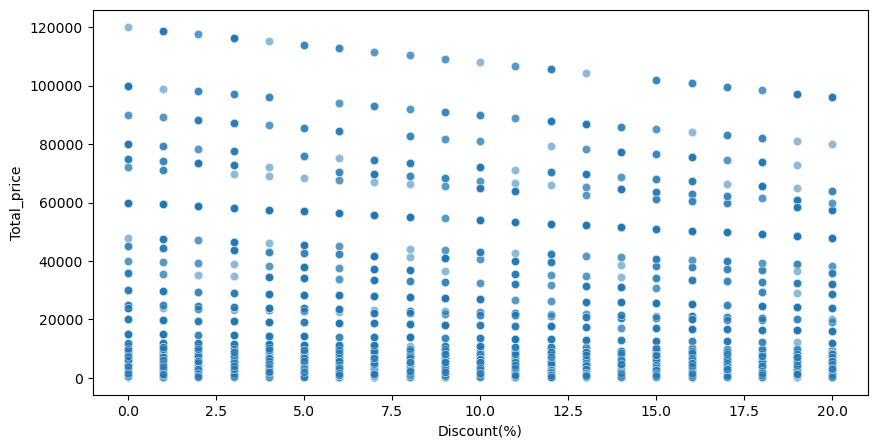

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = 'Discount(%)', y= 'Total_price', alpha = 0.5, palette='coolwarm')
plt.show()



**Plot:**  
We created a scatter plot of `Discount(%)` vs `Total_price` to check if there is any visible relationship.

**Insights:**
- The points seem fairly scattered, and there isn’t a clear upward trend.
- This suggests that giving higher discounts does **not always** result in higher total sales.
- There might be other factors (like product category or quantity) that have a stronger effect on total sales.


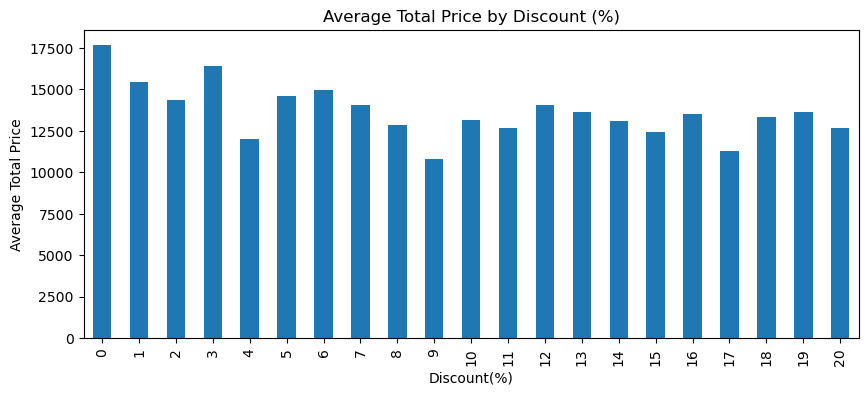

In [66]:
df.groupby('Discount(%)')['Total_price'].mean().plot(kind='bar', figsize=(10,4))
plt.ylabel('Average Total Price')
plt.title('Average Total Price by Discount (%)')
plt.show()
